# Predicting number of covid-19 confirmed cases using exponential growth

In [2]:

import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import math

data_pred= pd.read_csv("./Downloads/covid-19 mm/covid19_pred.csv")
data_pred['Date'] =  pd.to_datetime(data_pred['Date'])


Rewrite the exponential equation for linear regression

 y = a + b*x 


 log(x(t)) = log(x0) + log(b)*t

In [3]:
data_pred['logconfirmed'] = np.log(data_pred.Confirmed)
data_pred['index'] = data_pred.reset_index().index
data_pred.tail()

,Date,Confirmed,logconfirmed,index
8,2020-03-31,15,2.708050,8
9,2020-04-01,16,2.772589,9
10,2020-04-02,20,2.995732,10
11,2020-04-03,20,2.995732,11
12,2020-04-04,21,3.044522,12


In [9]:
X = data_pred.index
X = sm.add_constant(X)
y = data_pred.logconfirmed
mod = sm.OLS(y,X)
res = mod.fit()
print(res.params)
print(res.summary())

const    0.631963
x1       0.230825
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           logconfirmed   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.10e-07
Time:                        00:28:46   Log-Likelihood:               -0.57099
No. Observations:                  13   AIC:                             5.142
Df Residuals:                      11   BIC:                             6.272
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

/Users/zintun/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [10]:
x0 = math.exp(res.params[0])
b = math.exp(res.params[1])
print(x0)
print(b)

1.8813003852672774
1.2596382840923164


In [11]:
data_pred1 = data_pred[['Date','Confirmed']].copy()
size = data_pred1.shape[0]
for x in range(14):
    pred = x0 * pow(b,x+size)
    date = data_pred1['Date'][x+size-1] + datetime.timedelta(days=1)
    data_pred1 = data_pred1.append({'Date':date, 'Confirmed':math.floor(pred)}, ignore_index=True)

data_pred1

,Date,Confirmed
0,2020-03-23,2
1,2020-03-24,2
2,2020-03-25,3
3,2020-03-26,3
4,2020-03-27,3
5,2020-03-28,8
6,2020-03-29,10
7,2020-03-30,14
8,2020-03-31,15
9,2020-04-01,16


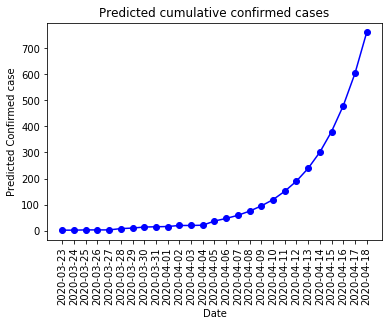

In [12]:
import matplotlib.pyplot as plt 
# plotting the points  
plt.plot(data_pred1['Date'],data_pred1['Confirmed'],'bo-') 

# naming the x axis 
plt.xlabel('Date') 
plt.xticks(rotation=90)
plt.xticks(data_pred1['Date'])

plt.ylabel('Predicted Confirmed case') 
  
# giving a title to my graph 
plt.title('Predicted cumulative confirmed cases') 
  
# function to show the plot 
plt.show() 